# Plotly


Plotly is a python library that allows you to make interactive data vizualizations. The base for this library is the javascript plotly library. 
For this project we used this package to explore data vizualizations using Jupyter notebooks, however plotly can also be used to create html files, or as part of Dash another tool created by plotly for web applications. 

There are approximately 40 chart types that can be made with this package.


# Pros of Plotly
https://towardsdatascience.com/4-reasons-why-plotly-is-the-best-visualization-library-18c27de05b95

# Getting Started

In [2]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset("penguins")
penguins.columns
#import warblers dataset
warblers = pd.read_csv("data/BTBW_measurements.csv")

# Plot Options

## Scatterplot

In [23]:


fig = px.scatter(penguins, x="body_mass_g", y="flipper_length_mm",
color_discrete_sequence=['Teal']) #make a scatterplot
fig.update_layout(title={"text": "Body Mass vs Flipper Length in Adelie, Chinstrap and Gentoo Penguins", "x": 0.5},
 yaxis_title="Flipper Length (mm)", xaxis_title = "Body Mass (g)") #update x and y axis
fig.show()

## Boxplot

In [273]:
sub_warblers = warblers[warblers['BirdSex'].notna()]
new_df = sub_warblers.loc[sub_warblers['BirdSex'].isin(['M','F'])] #select observations with known sex
fig = px.box(new_df, y="Mass", x = 'BirdSex') #make a boxplot
fig.update_layout(title={"text": "Black-throated Blue Warbler Mass", "x": 0.5}, #update title and center
 yaxis_title="Mass (g)", xaxis_title = "Sex") #update x and y labels 
fig.show()


## Histogram

In [3]:


fig = px.histogram(warblers, x='Year', color = 'Age' ) #make a histogram, color by age
fig.update_layout(title={"text": "Total Black-Throated Blue Warbler Captures by Year", "x": 0.5}, yaxis_title="Total")
fig.update_layout(bargap=0.2) #space out bars
fig.show()

In [21]:

fig = px.box(penguins, y="body_mass_g", x = "species")
fig.update_layout(title={"text": "Body Mass of Penguins", "x": 0.5},
 yaxis_title="Body Mass (g)", xaxis_title = "Species")
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([ #add dropdown menu with buttons
                dict(
                    args=["type", "box"], #change plot type to boxplot
                    label="Boxplot", #label the button
                    method="restyle" #modify data or data attributes
                ),
                dict(
                    args=["type", "violin"], #change plot type to violin, hybrid box plot and density plot
                    label="Violin", #label the button
                    method="restyle" #modify data or data attributes
                )
            ])
        ),
    ]
) 
fig.show()

# Seaborn and Plotly Comparison

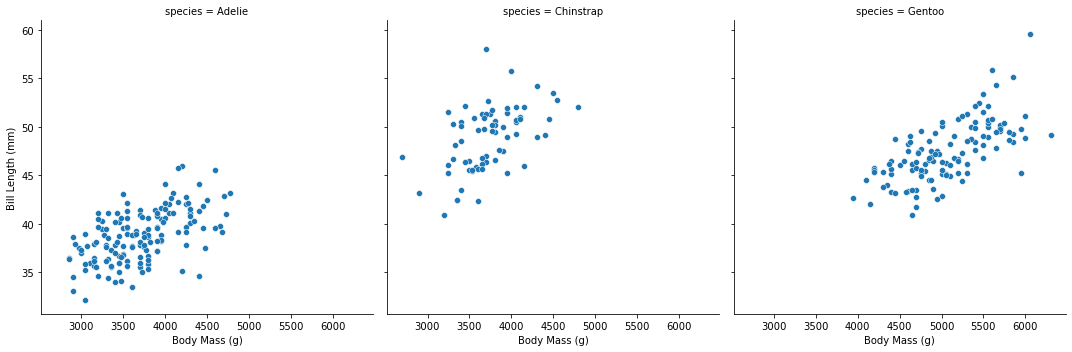

In [11]:
fig = sns.relplot(
    data = penguins,
     x = "body_mass_g",
      y = "bill_length_mm",
      col= "species") #create a new side by side plot for each species
fig.set_axis_labels(x_var= "Body Mass (g)", y_var = "Bill Length (mm)")


In [19]:

from curses import COLOR_GREEN


fig = px.scatter(penguins, x = "body_mass_g", y = "bill_length_mm",
 animation_frame = 'species', #changed animation based on species
  range_x=[2500,6500], #change x axis range
range_y = [25,60],#change y axis range 
color_discrete_sequence=['purple']) #change color to purple
fig.update_layout(title={"text": "Penguin Body Mass vs Bill Length", "x": 0.5},
 xaxis_title=" Body Mass (g)", yaxis_title = "Bill Length (mm)")
fig.update_layout(autosize = False, #manually set size
 width=700, height = 700) #set width and height

fig.show()



### Citations
Hallworth, M.T., S.A. Kaiser, S. Sillett, M.S. Webster, R.T. Holmes, and N.L. Rodenhouse. 2022. Black-throated Blue Warbler capture histories, Hubbard Brook Experimental Forest ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/d4137fae50280b91d95c9fc099f7ccd7 (Accessed 2022-09-09). 

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago
  (Antarctica) penguin data. R package version 0.1.0.
  https://allisonhorst.github.io/palmerpenguins/